# Chapitre 5 : Fiabilité du système distribué

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import * # Import principal : module de simulation

%matplotlib inline 

In [2]:
NB_NODES = 50
DURATION = 10000   # Nb samples
REVOLUTION = 1800  # Nb samples
SAMPLE_FREQ = 0.1  # Hz, 1 sample every 10 seconds
CONNECTION_RANGE = 30000 # m

# Variables globales pour l'analyse
SAMPLE_STEP = 12
NB_REPETITIONS = 30

# Variables globales figures
TMAX = REVOLUTION/SAMPLE_FREQ
IDX = np.arange(0, TMAX, (1/SAMPLE_FREQ)*SAMPLE_STEP) # conversion en secondes

## 1. Analyse de la fiabilité du graphe de référence
Résultats obtenus avec le script `chap5_reliability_undivided.py`

In [106]:
df_ref = pd.read_csv('..\output\data\sat50_reliability_undivided_sampled12.csv' , sep=',', index_col='Unnamed: 0')
df_ref = df_ref.set_index('Timestamp')
df_ref

,RFlow,RCost,Efficiency,Redundancy,Disparity,Criticity
Timestamp,,,,,,
0,1.0,8734,0.459133,3.888163,0.288980,12
12,1.0,8824,0.458643,3.877551,0.292381,13
24,1.0,8672,0.456952,4.216327,0.296465,14
36,1.0,8616,0.470500,3.360816,0.248742,11
48,1.0,9024,0.410649,4.475102,0.333679,18
...,...,...,...,...,...,...
1740,1.0,9200,0.421857,4.953469,0.339085,19
1752,1.0,8806,0.425260,4.457143,0.327870,17
1764,1.0,8720,0.440979,4.564898,0.292327,12


Visualisation de l'évolution temporelle des métriques sur le graphe de référence :
 * robustesse : robustesse de flux, coût de routage, efficience réseau
 * résilience : redondance des chemins, disparité, nombre de noeuds critiques

(0.0, 22.0)

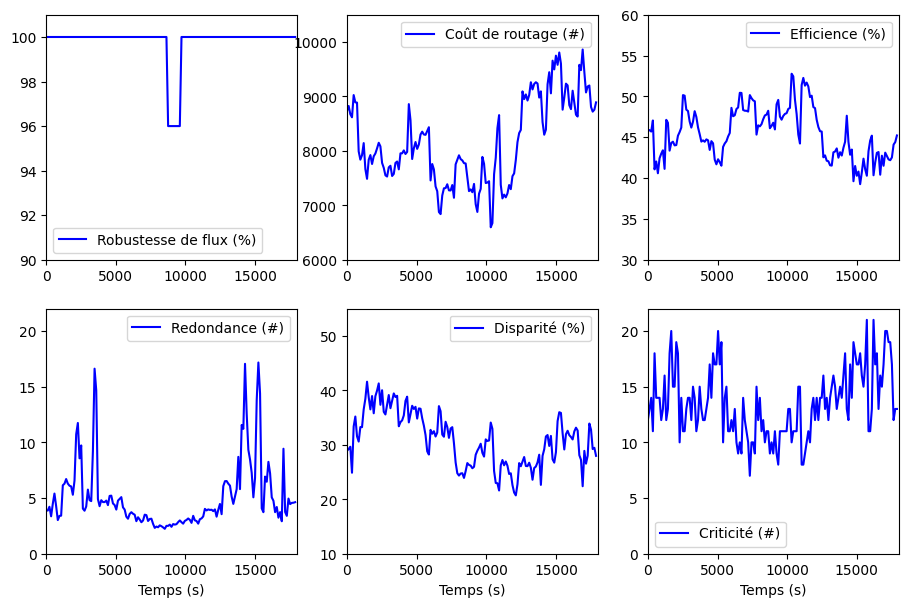

In [126]:
fig, axes = plt.subplots(figsize=(11,7), nrows=2, ncols=3)

ax = axes[0][0]
ax.plot(IDX, df_ref['RFlow']*100, c='blue', label='Robustesse de flux (%)')
ax.legend()
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 5000))
ax.set_ylim(90, 101)

ax = axes[0][1]
ax.plot(IDX, df_ref['RCost'], c='blue', label='Coût de routage (#)')
ax.legend()
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 5000))
ax.set_ylim(6000, 10500)

ax = axes[0][2]
ax.plot(IDX, df_ref['Efficiency']*100, c='blue', label='Efficience (%)')
ax.legend()
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 5000))
ax.set_ylim(30, 60)


ax = axes[1][0]
ax.plot(IDX, df_ref['Redundancy'], c='blue', label='Redondance (#)')
ax.legend()
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 5000))
ax.set_xlabel('Temps (s)')
ax.set_ylim(0, 22)

ax = axes[1][1]
ax.plot(IDX, df_ref['Disparity']*100, c='blue', label='Disparité (%)')
ax.legend()
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 5000))
ax.set_xlabel('Temps (s)')
ax.set_ylim(10, 55)

ax = axes[1][2]
ax.plot(IDX, df_ref['Criticity'], c='blue', label='Criticité (#)')
ax.legend()
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 5000))
ax.set_xlabel('Temps (s)')
ax.set_ylim(0, 22)

In [130]:
# Nombre moyen de noeuds critiques (epsilon=0.05)
df_ref['Criticity'].mean()

13.513333333333334

## 2. Comparaison des performances des graphes divisés 
Résultats pour RND, MIRW et FFD obtenus avec le script `chap5_reliability_divided.py`

Résultats pour k-means obtenus avec le script `chap5_reliability_kmeans.py`

In [4]:
df_rnd = pd.read_csv('..\output\data\sat50_reliability_RND_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_mirw = pd.read_csv('..\output\data\sat50_reliability_MIRW_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_ffd = pd.read_csv('..\output\data\sat50_reliability_FFD_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_kmeans = pd.read_csv('..\output\data\sat50_reliability_KMeans_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')

df_rnd = df_rnd.groupby('Timestamp').mean()
df_mirw = df_mirw.groupby('Timestamp').mean()
df_ffd = df_ffd.groupby('Timestamp').mean()
df_kmeans = df_kmeans.groupby('Timestamp').mean()

df_kmeans.head()

,RFlow,RCost,Efficiency,Redundancy,Disparity,Criticity
Timestamp,,,,,,
0,1.0,397.200000,0.783116,1.352292,0.146330,2.166667
12,1.0,395.333333,0.782039,1.372822,0.176448,2.166667
24,1.0,403.600000,0.780234,1.405983,0.187879,2.300000
36,1.0,412.666667,0.772800,1.355545,0.180456,3.166667
48,1.0,433.600000,0.748511,1.421708,0.185554,3.666667


In [5]:
ref_rcost_avg = df_ref['RCost'].mean()
print('Coût de routage moyen dans le graphe original:', int(ref_rcost_avg), 'transmissions')

Coût de routage moyen dans le graphe original: 8171 transmissions


(-20.0, 20.0)

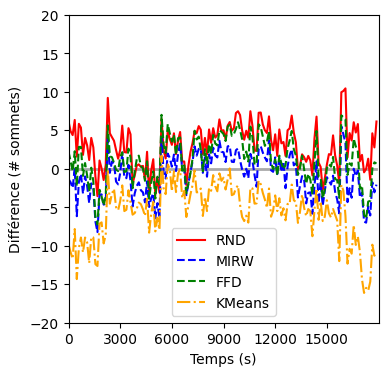

In [35]:
# Visualisation de l'écart des métriques par rapport aux métriques de référence
fig,ax = plt.subplots(figsize=(4,4))
metric = 'Criticity'    # paramètre à changer si besoin

ax.plot(IDX, df_ref[metric] - df_ref[metric], c='darkgray', lw=2) 
ax.plot(IDX, df_rnd[metric] - df_ref[metric], '-r', label='RND')
ax.plot(IDX, df_mirw[metric] - df_ref[metric], '--b', label='MIRW')
ax.plot(IDX, df_ffd[metric] - df_ref[metric], '--g', label='FFD')
ax.plot(IDX, df_kmeans[metric] - df_ref[metric], ls='-.', c='orange', label='KMeans')


ax.legend()
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Différence (# sommets)')
ax.set_xlim(0,TMAX)
ax.set_xticks(np.arange(0, TMAX, 3000))
ax.set_ylim(-20, 20)

## 2. Analyse des distributions

In [48]:
import matplotlib.ticker as ticker

def box_plot(datasets, index, fill_color, hatch_pattern=None):
    x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
    x_pos = (x_pos_range * 0.5) + 0.75
    bp = ax.boxplot(
        np.array(datasets[index]), sym='', whis=[0, 100], widths=0.6 / len(datasets),
        labels=list(datasets[0]),
        positions=[x_pos[index] + j * 1 for j in range(len(datasets[index].T))],
        patch_artist=True
    )
    for median in bp['medians']:
        median.set_color('black')
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
        if hatch_pattern: 
            patch.set(hatch=hatch_pattern)    
    return bp

In [37]:
# Timestamps représentant des topologies à densité faible, intermédiaire, ou forte
T_HIGH, T_LOW, T_MED = 348, 900, 1344

range_low = np.arange(T_LOW-5*SAMPLE_STEP, T_LOW+5*SAMPLE_STEP, SAMPLE_STEP).tolist()
range_avg = np.arange(T_MED-5*SAMPLE_STEP, T_MED+5*SAMPLE_STEP, SAMPLE_STEP).tolist() 
range_high = np.arange(T_HIGH-5*SAMPLE_STEP, T_HIGH+5*SAMPLE_STEP, SAMPLE_STEP).tolist()

In [102]:
metric = 'Disparity' # à changer si besoin

data_original = pd.DataFrame({
    'Faible': df_ref[metric].loc[df_ref.index.isin(range_low)].tolist(),
    'Moyenne': df_ref[metric].loc[df_ref.index.isin(range_avg)].tolist(),
    'Elevée': df_ref[metric].loc[df_ref.index.isin(range_high)].tolist()
})

data_rnd = pd.DataFrame({
    'Faible': df_rnd[metric].loc[df_rnd.index.isin(range_low)].tolist(),
    'Moyenne': df_rnd[metric].loc[df_rnd.index.isin(range_avg)].tolist(),
    'Elevée': df_rnd[metric].loc[df_rnd.index.isin(range_high)].tolist()
})

data_mirw = pd.DataFrame({
    'Faible': df_mirw[metric].loc[df_mirw.index.isin(range_low)].tolist(),
    'Moyenne': df_mirw[metric].loc[df_mirw.index.isin(range_avg)].tolist(),
    'Elevée': df_mirw[metric].loc[df_mirw.index.isin(range_high)].tolist()
})

data_ffd = pd.DataFrame({
    'Faible': df_ffd[metric].loc[df_ffd.index.isin(range_low)].tolist(),
    'Moyenne': df_ffd[metric].loc[df_ffd.index.isin(range_avg)].tolist(),
    'Elevée': df_ffd[metric].loc[df_ffd.index.isin(range_high)].tolist()
})

data_kmeans = pd.DataFrame({
    'Faible': df_kmeans[metric].loc[df_kmeans.index.isin(range_low)].tolist(),
    'Moyenne': df_kmeans[metric].loc[df_kmeans.index.isin(range_avg)].tolist(),
    'Elevée': df_kmeans[metric].loc[df_kmeans.index.isin(range_high)].tolist()
})

datasets = [data_original, data_rnd, data_mirw, data_ffd, data_kmeans]

In [103]:
# A exécuter pour les métriques exprimées en % (RFlow, Efficiency, Disparity)
for i,df in enumerate(datasets):
    datasets[i] = datasets[i]*100

Text(0.5, 0, 'Densité de noeuds')

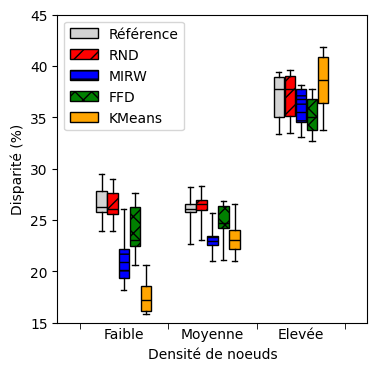

In [105]:
# Distribution des métriques de référence et par algorithme
fig, ax = plt.subplots(figsize=(4,4))
bp0 = box_plot(datasets, 0, 'lightgray')
bp1 = box_plot(datasets, 1, 'red', hatch_pattern='//')
bp2 = box_plot(datasets, 2, 'blue', hatch_pattern='--')
bp3 = box_plot(datasets, 3, 'green', hatch_pattern='xx')
bp4 = box_plot(datasets, 4, 'orange', hatch_pattern=None)

plt.xticks(np.arange(len(list(datasets[0]))) + 1)
plt.gca().xaxis.set_minor_locator(ticker.FixedLocator(
    np.array(range(len(list(datasets[0])) + 1)) + 0.5)
)
plt.gca().tick_params(axis='x', which='minor', length=4)
plt.gca().tick_params(axis='x', which='major', length=0)

ax.legend(
    [bp0["boxes"][0], bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0]], 
    ['Référence', 'RND', 'MIRW', 'FFD', 'KMeans'], 
    loc='best')
ax.set_ylim(15,45)
ax.set_ylabel('Disparité (%)')
ax.set_xlabel('Densité de noeuds')

Text(0.5, 0, 'Densité de noeuds')

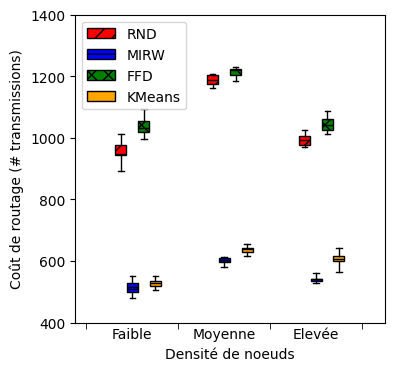

In [55]:
# Cas particulier du RCost en raison de l'échelle
fig, ax = plt.subplots(figsize=(4,4))
bp1 = box_plot(datasets, 1, 'red', hatch_pattern='//')
bp2 = box_plot(datasets, 2, 'blue', hatch_pattern='--')
bp3 = box_plot(datasets, 3, 'green', hatch_pattern='xx')
bp4 = box_plot(datasets, 4, 'orange', hatch_pattern=None)

plt.xticks(np.arange(len(list(datasets[0]))) + 1)
plt.gca().xaxis.set_minor_locator(ticker.FixedLocator(
    np.array(range(len(list(datasets[0])) + 1)) + 0.5)
)
plt.gca().tick_params(axis='x', which='minor', length=4)
plt.gca().tick_params(axis='x', which='major', length=0)

ax.legend(
    [bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0]], 
    ['RND', 'MIRW', 'FFD', 'KMeans'], 
    loc='upper left')
ax.set_ylim(400, 1400)
ax.set_ylabel('Coût de routage (# transmissions)')
ax.set_xlabel('Densité de noeuds')